In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df  = pd.read_csv('fitness_health_500_new.csv')
df.head()

,record_id,date,city,gender,steps,calories_burned,sleep_hours,avg_heart_rate,activity_level
0,1,2024-03-22,Kochi,Male,8241,2144,7.3,96,High
1,2,2024-02-05,Chennai,Male,6414,2106,8.4,87,Low
2,3,2024-04-04,Kochi,Male,5826,2417,5.9,72,High
3,4,2024-02-24,Kochi,Male,7604,1434,4.4,71,Low
4,5,2024-01-28,Chennai,Male,4467,2325,5.4,61,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        500 non-null    int64  
 1   date             500 non-null    object 
 2   city             500 non-null    object 
 3   gender           500 non-null    object 
 4   steps            500 non-null    int64  
 5   calories_burned  500 non-null    int64  
 6   sleep_hours      500 non-null    float64
 7   avg_heart_rate   500 non-null    int64  
 8   activity_level   500 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 35.3+ KB


In [4]:
df.isnull().sum()

record_id          0
date               0
city               0
gender             0
steps              0
calories_burned    0
sleep_hours        0
avg_heart_rate     0
activity_level     0
dtype: int64

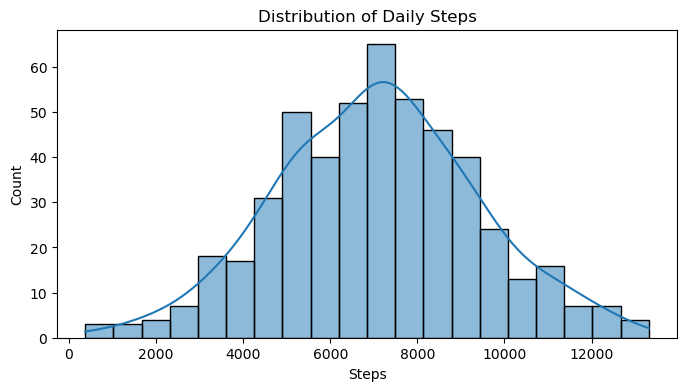

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df["steps"], bins=20, kde=True)
plt.title("Distribution of Daily Steps")
plt.xlabel("Steps")
plt.ylabel("Count")
plt.show()


Findings : Most people walk a moderate number of steps each day, mainly between 5,000 and 9,000.


In [9]:
avg_steps = df.groupby("activity_level")["steps"].mean().reset_index()
avg_steps

,activity_level,steps
0,High,7228.622857
1,Low,6950.715232
2,Moderate,7014.597701


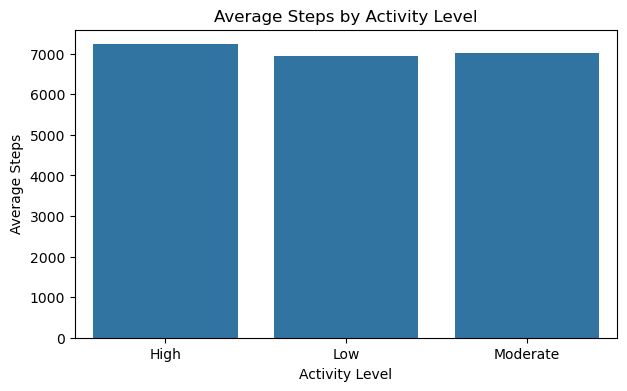

In [12]:
plt.figure(figsize=(7,4))
sns.barplot(data=avg_steps, x="activity_level", y="steps" )
plt.title("Average Steps by Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Average Steps")
plt.show()


Findings : People with a high activity level take slightly more steps on average, while low and moderate activity groups walk almost the same amount.


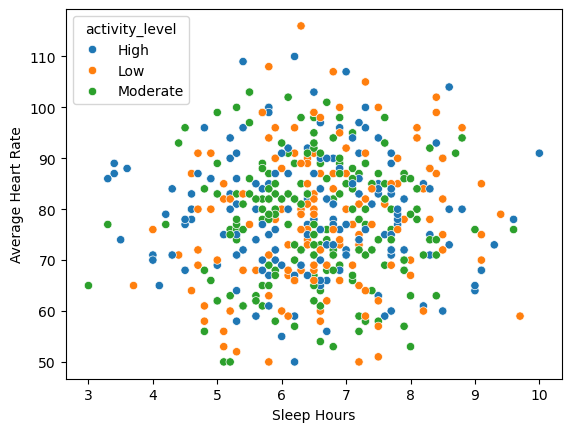

In [15]:
sns.scatterplot(df,x='sleep_hours',y='avg_heart_rate',hue="activity_level")
plt.xlabel("Sleep Hours")
plt.ylabel("Average Heart Rate")
plt.show()

Findings : How long a person sleeps doesnt effect the average heart rate

In [17]:
avg_city_steps = df.groupby("city")["steps"].mean().reset_index()
avg_city_steps

,city,steps
0,Bangalore,6960.275510
1,Chennai,7118.610526
2,Delhi,7118.514019
3,Kochi,7063.989247
4,Mumbai,7085.046729


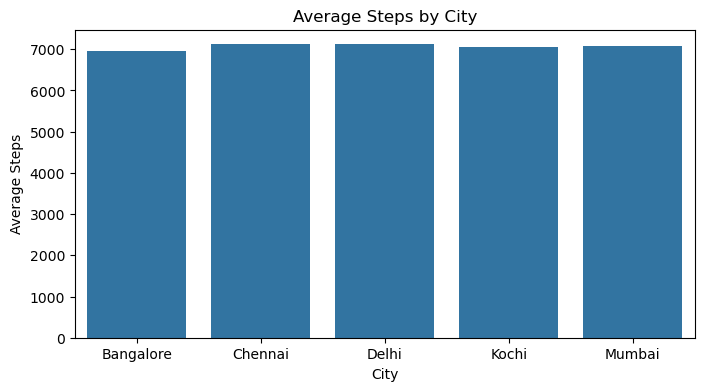

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(data=avg_city_steps, x="city", y="steps")
plt.title("Average Steps by City")
plt.xlabel("City")
plt.ylabel("Average Steps")
plt.show()


Findings : Activity levels are almost same across different city

In [22]:
avg_steps_gender = df.groupby("gender")["steps"].mean().reset_index()
avg_steps_gender

,gender,steps
0,Female,7215.753906
1,Male,6917.516393


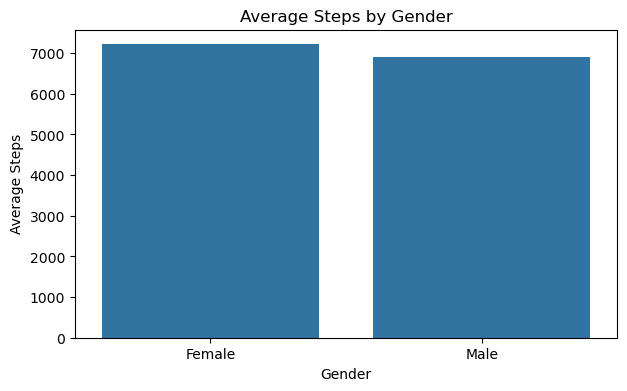

In [23]:
plt.figure(figsize=(7,4))
sns.barplot(data=avg_steps_gender, x="gender", y="steps")
plt.title("Average Steps by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Steps")
plt.show()


Findings : Females takes more average steps when compared to men

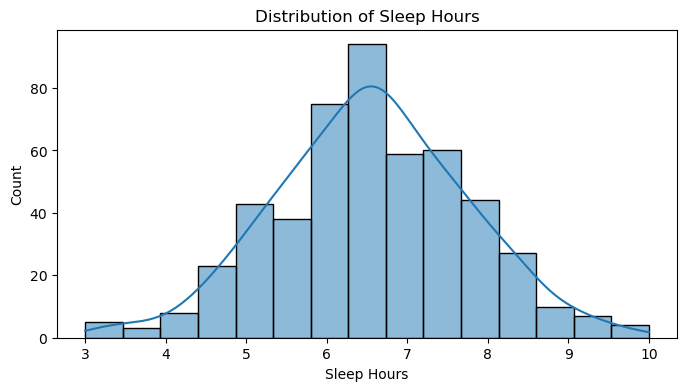

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(df["sleep_hours"], bins=15, kde=True)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Count")
plt.show()


Findings : Most people sleep around 6 to 7 hours, with only a few sleeping much less or much more.


# Conclusion

Overall, people in this dataset are moderately active, get around 6–7 hours of sleep, and show only small differences in activity or sleep patterns across cities and activity levels.
